In [145]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [89]:
# Import datasets
df = pd.read_csv("Mental Health Dataset.csv")

We would like to use this dataset to gain a better understanding of how different factors can affect a persons mental health. 
We would also like to gain an overview of general tendencies in different countries. 

In [90]:
# Removing unnecessary columns 
df.drop(axis=1, columns=["Timestamp"], inplace=True)

In [91]:
# Analyzing null values 
df.info()
df["self_employed"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   292364 non-null  object
 1   Country                  292364 non-null  object
 2   Occupation               292364 non-null  object
 3   self_employed            287162 non-null  object
 4   family_history           292364 non-null  object
 5   treatment                292364 non-null  object
 6   Days_Indoors             292364 non-null  object
 7   Growing_Stress           292364 non-null  object
 8   Changes_Habits           292364 non-null  object
 9   Mental_Health_History    292364 non-null  object
 10  Mood_Swings              292364 non-null  object
 11  Coping_Struggles         292364 non-null  object
 12  Work_Interest            292364 non-null  object
 13  Social_Weakness          292364 non-null  object
 14  mental_health_interv

No     257994
Yes     29168
Name: self_employed, dtype: int64

In [92]:
# Replacing null values with "no", because it is most likely to be "no" 
df["self_employed"].fillna("No", inplace=True)

In [93]:
# Analyzing the data structure
df.describe()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,239850,171308,66351,263196,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


Most partipants are men, from USA and are currently in treatment. Most common occupation is house-wife

In [94]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indicies = shuffled_indices[:test_set_size]
    train_indicies = shuffled_indices[test_set_size:]
    return data.iloc[train_indicies], data.iloc[test_indicies]

In [95]:
train_set, test_set = split_train_test(df, 0.2)
train_set_copy = train_set.copy()

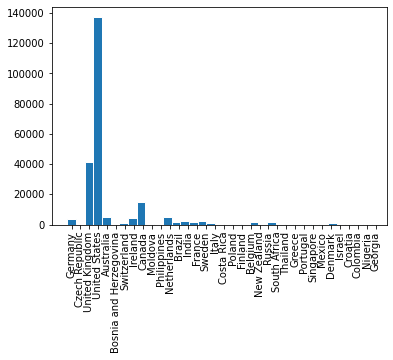

In [96]:
histPlot = plt.hist(train_set["Country"], edgecolor='white', bins=35, align="left")
plt.xticks(rotation='vertical')
plt.show()

In [97]:
# Endcoding text to numbers
ordinal_encoder = OrdinalEncoder()

# Gender
df_gender = train_set_copy[["Gender"]]
df_gender_encoded = ordinal_encoder.fit_transform(df_gender)

# Country
df_country = train_set_copy[["Country"]]
df_country_encoded = ordinal_encoder.fit_transform(df_country)

# Occupation
df_occupation = train_set_copy[["Occupation"]]
df_occupation_encoded = ordinal_encoder.fit_transform(df_occupation)

# Self-employed
df_self_employed = train_set_copy[["self_employed"]]
df_self_employed_encoded = ordinal_encoder.fit_transform(df_self_employed)

#family history
df_family_history = train_set_copy[["family_history"]]
df_family_history_encoded = ordinal_encoder.fit_transform(df_family_history)

#treatment
df_treatment = train_set_copy[["treatment"]]
df_treatment_encoded = ordinal_encoder.fit_transform(df_treatment)

#Days_indoors
df_days_indoors = train_set_copy[["Days_Indoors"]]
df_days_indoors_encoded = ordinal_encoder.fit_transform(df_days_indoors)

#Growing_stress
df_growing_stress = train_set_copy[["Growing_Stress"]]
df_growing_stress_encoded = ordinal_encoder.fit_transform(df_growing_stress)

#Changes_Habits
df_changes_habits = train_set_copy[["Changes_Habits"]]
df_changes_habits_encoded = ordinal_encoder.fit_transform(df_changes_habits)

#Mental_Health_History
df_mental_health_history = train_set_copy[["Mental_Health_History"]]
df_mental_health_history_encoded = ordinal_encoder.fit_transform(df_mental_health_history)

#Mood_Swings
df_mood_swings = train_set_copy[["Mood_Swings"]]
df_mood_swings_encoded = ordinal_encoder.fit_transform(df_mood_swings)

#Coping_Struggles
df_coping_struggles = train_set_copy[["Coping_Struggles"]]
df_coping_struggles_encoded = ordinal_encoder.fit_transform(df_coping_struggles)

#Work_Interest
df_work_interest = train_set_copy[["Work_Interest"]]
df_work_interest_encoded = ordinal_encoder.fit_transform(df_work_interest)

#Social_Weakness
df_social_weakness = train_set_copy[["Social_Weakness"]]
df_social_weakness_encoded = ordinal_encoder.fit_transform(df_social_weakness)

#mental_health_interview
df_mental_health_interview = train_set_copy[["mental_health_interview"]]
df_mental_health_interview_encoded = ordinal_encoder.fit_transform(df_mental_health_interview)

#care_options
df_care_options = train_set_copy[["care_options"]]
df_care_options_encoded = ordinal_encoder.fit_transform(df_care_options)


We are using min-max (Normalisation) on our data, because they don't have Gaussian distribution

In [98]:
# Min-max cells 
scaler = MinMaxScaler()

# Country
scaler.fit(df_country_encoded)
min_max_transformed_country = scaler.transform(df_country_encoded)

# Occupation
scaler.fit(df_occupation_encoded)
min_max_transformed_occupation = scaler.transform(df_occupation_encoded)

# Days_Indoors
scaler.fit(df_days_indoors_encoded)
min_max_transformed_days_indoors = scaler.transform(df_days_indoors_encoded)

# Growing_Stress
scaler.fit(df_growing_stress_encoded)
min_max_transformed_growing_stress = scaler.transform(df_growing_stress_encoded)

# Changes_Habits
scaler.fit(df_changes_habits_encoded)
min_max_transformed_changes_habits = scaler.transform(df_changes_habits_encoded)

# Mental_Health_History
scaler.fit(df_mental_health_history_encoded)
min_max_transformed_mental_health_history = scaler.transform(df_mental_health_history_encoded)

# Mood_Swings
scaler.fit(df_mood_swings_encoded)
min_max_transformed_mood_swings = scaler.transform(df_mood_swings_encoded)

# Work_Interest
scaler.fit(df_work_interest_encoded)
min_max_transformed_work_interest = scaler.transform(df_work_interest_encoded)

# Social_Weakness	
scaler.fit(df_social_weakness_encoded)
min_max_transformed_social_weakness = scaler.transform(df_social_weakness_encoded)

# mental_health_interview	
scaler.fit(df_mental_health_interview_encoded)
min_max_transformed_mental_health_interview = scaler.transform(df_mental_health_interview_encoded)

# care_options
scaler.fit(df_care_options_encoded)
min_max_transformed_care_options = scaler.transform(df_care_options_encoded)

We considered these 3 different models:
- Linear regression
- Classification 
- Logistic regression

To solve our problem, we would need to understand the coalation between mental health issues and the factors in the dataset. Therefor classifaction would'nt be as beneficial for the project as the other 2 as it only outputs categories and with Logistic only able to ouput true/false, 1/0 or yes/no we went with Linear regression.

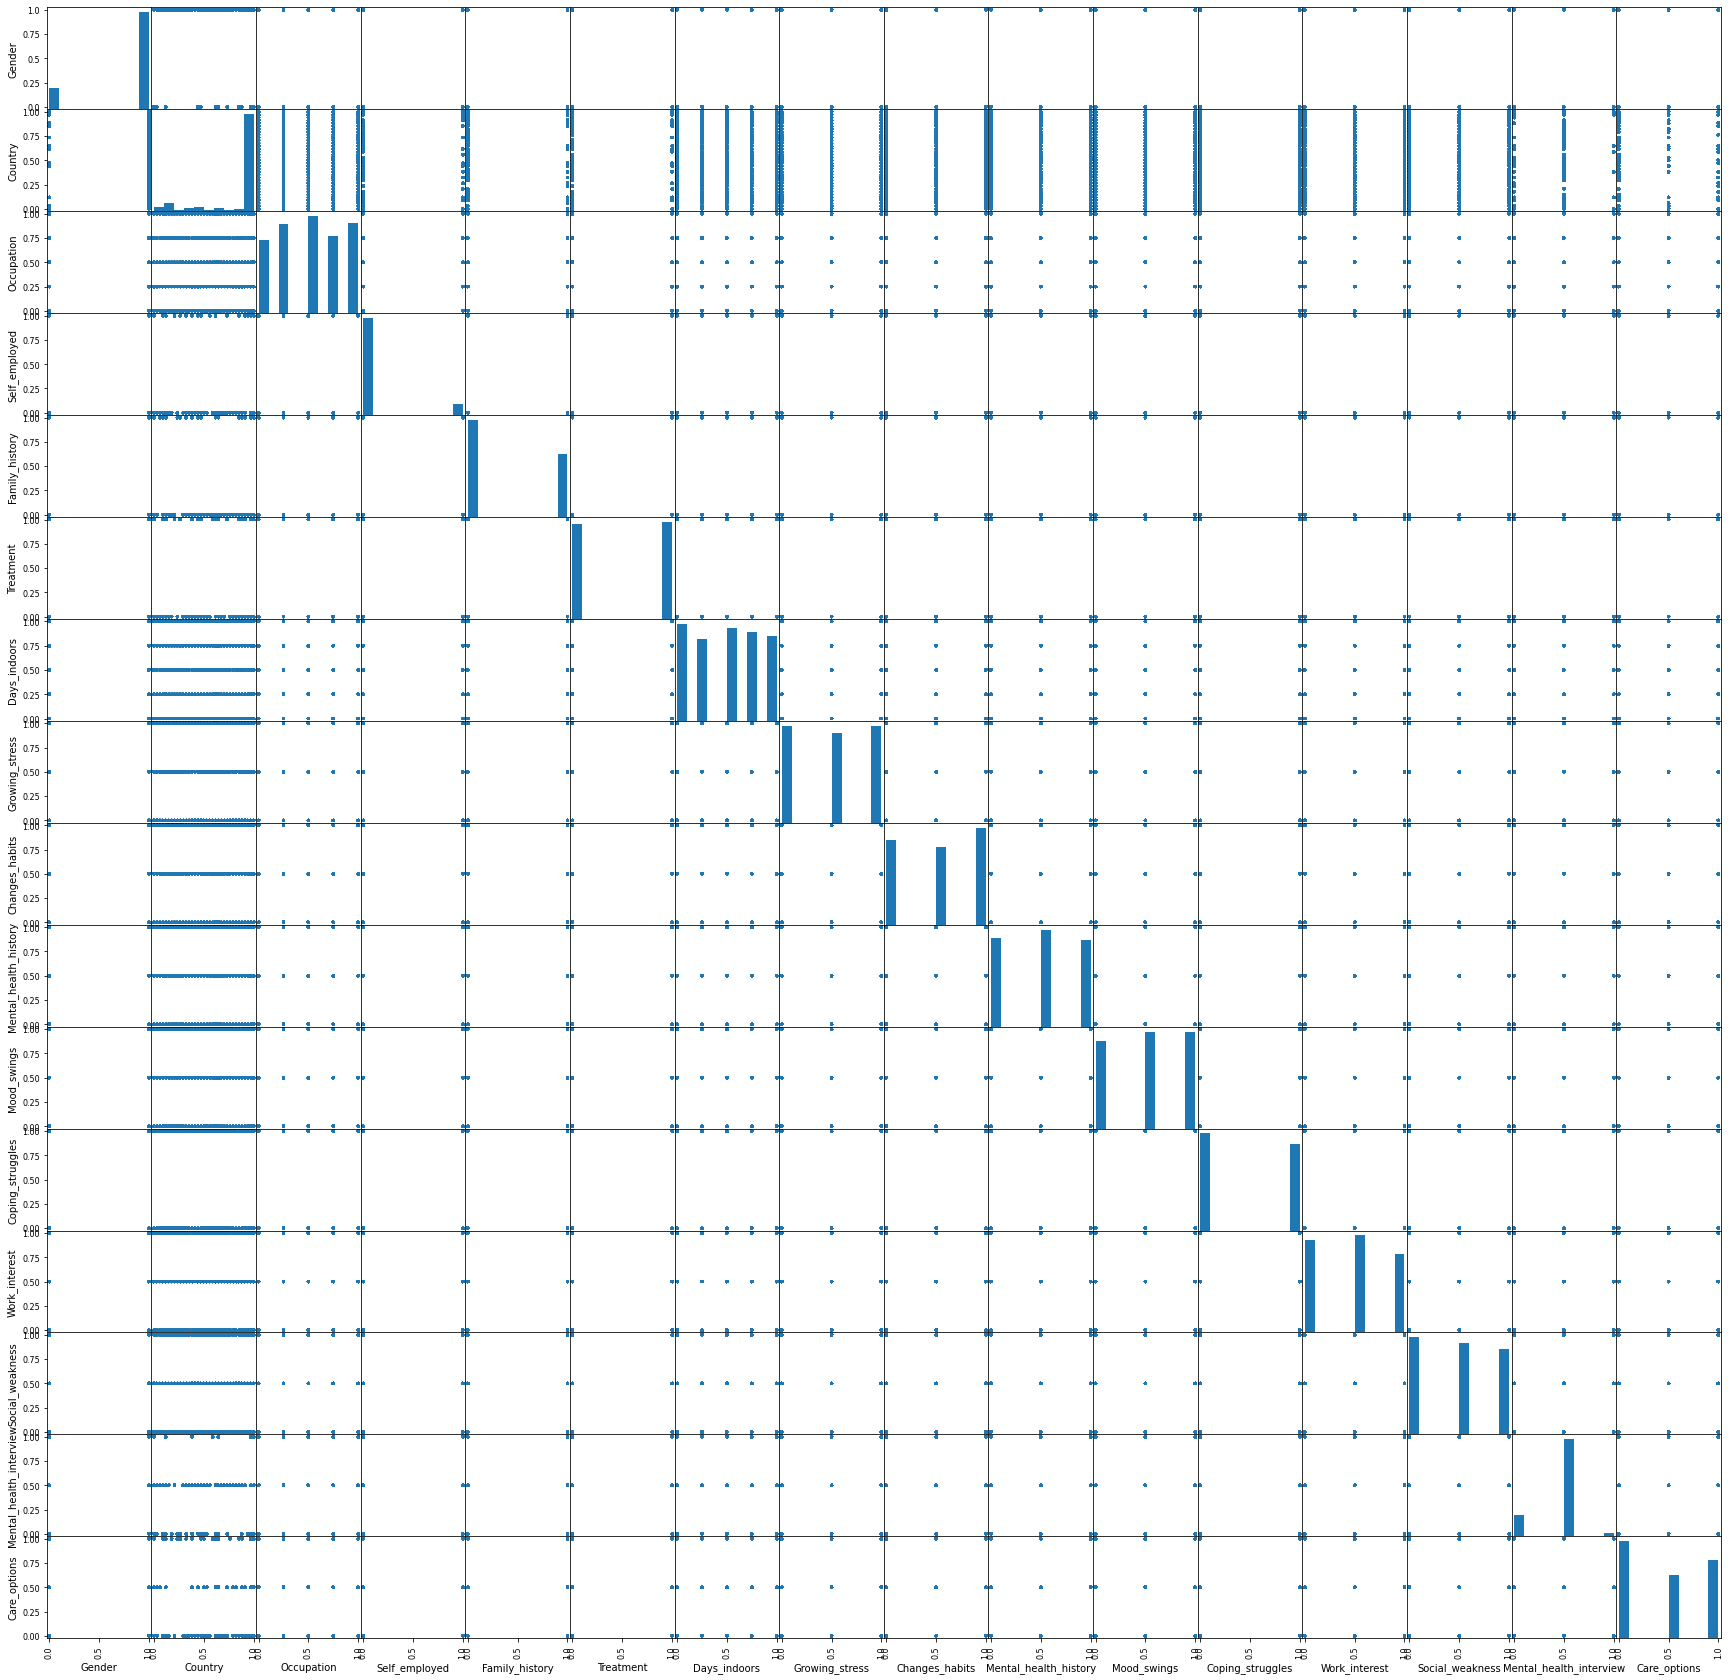

In [144]:
# Combining our data into one pandas dataframe for creating a scatter matrix
nd_array_combined = df_gender_encoded
nd_array_combined = np.append(nd_array_combined, min_max_transformed_country, 1)
nd_array_combined = np.append(nd_array_combined, min_max_transformed_occupation, 1)
nd_array_combined = np.append(nd_array_combined, df_self_employed_encoded, 1)
nd_array_combined = np.append(nd_array_combined, df_family_history_encoded, 1)
nd_array_combined = np.append(nd_array_combined, df_treatment_encoded, 1)
nd_array_combined = np.append(nd_array_combined, min_max_transformed_days_indoors, 1)
nd_array_combined = np.append(nd_array_combined, min_max_transformed_growing_stress, 1)
nd_array_combined = np.append(nd_array_combined, min_max_transformed_changes_habits, 1)
nd_array_combined = np.append(nd_array_combined, min_max_transformed_mental_health_history, 1)
nd_array_combined = np.append(nd_array_combined, min_max_transformed_mood_swings, 1)
nd_array_combined = np.append(nd_array_combined, df_coping_struggles_encoded, 1)
nd_array_combined = np.append(nd_array_combined, min_max_transformed_work_interest, 1)
nd_array_combined = np.append(nd_array_combined, min_max_transformed_social_weakness, 1)
nd_array_combined = np.append(nd_array_combined, min_max_transformed_mental_health_interview, 1)
nd_array_combined = np.append(nd_array_combined, min_max_transformed_care_options, 1)

labels = ["Gender", "Country", "Occupation", "Self_employed", "Family_history", 
          "Treatment", "Days_indoors", "Growing_stress", "Changes_habits", 
          "Mental_health_history", "Mood_swings", "Coping_struggles", "Work_interest",
          "Social_weakness", "Mental_health_interview", "Care_options"]

df_combined = pd.DataFrame(nd_array_combined, columns=labels)
pd.plotting.scatter_matrix(df_combined, figsize=(30, 30))
plt.show()

In [154]:
# Linear regression model
nd_array_combined_copy = nd_array_combined.copy()
lin_reg = LinearRegression()
lin_reg.fit(nd_array_combined_copy, labels)

TypeError: LinearRegression.fit() missing 1 required positional argument: 'y'